In [10]:
import pandas as pd
import numpy as np
import glob
import sqlite3
from sqlalchemy import create_engine
# PyMySQL
import pymysql
pymysql.install_as_MySQLdb()
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
sqlite_conn = sqlite3.connect('../db/stock.sqlite')

In [29]:
stock = 'MSFT'

In [34]:
cursor = sqlite_conn.cursor()
rows = cursor.execute("SELECT * FROM master WHERE Name = ?", (stock,)).fetchall()
df = pd.DataFrame(rows)
df.head()

,0,1,2,3,4,5,6,7
0,0,1986-03-13,0.1,0.1,0.1,0.09,3582600,MSFT
1,1,1986-03-14,0.1,0.1,0.1,0.10,1070000,MSFT
2,2,1986-03-17,0.1,0.1,0.1,0.10,462400,MSFT
3,3,1986-03-18,0.1,0.1,0.1,0.10,230800,MSFT
4,4,1986-03-19,0.1,0.1,0.1,0.10,166300,MSFT


In [44]:
df_all = df.rename(columns={ df.columns[1]: "Date",
                    df.columns[2]: "Open",
                    df.columns[3]: "Close",
                    df.columns[4]: "High",
                    df.columns[5]: "Low",
                    df.columns[6]: "Volume",
                    df.columns[6]: "Ticker"
                  })

In [45]:
df_all['Date'] = pd.to_datetime(df_all['Date'])
date_list = df_all['Date'].tolist()
close_list = df_all['Close'].tolist()

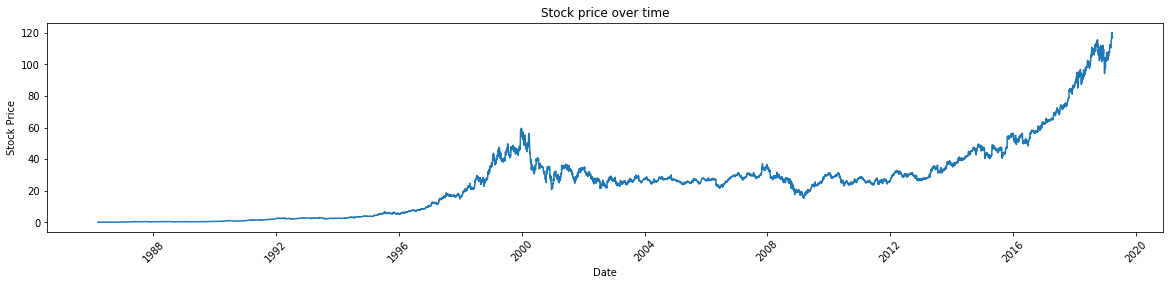

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize=(20,5))
plt.title("Stock price over time")
plt.ylabel("Stock Price")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.plot(date_list, close_list)
plt.yticks()
plt.gcf().subplots_adjust(bottom=0.3)
#plt.autoscale()
plt.show()
plt.clf()      

In [53]:
split_date = df_all["Date"].str.split("-", n = 2, expand = True) 

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [50]:
df2 = df.loc[df['Year'] == '2018', :]
df2['Date'] = pd.to_datetime(df2['Date'])
df2.head()

KeyError: 'Year'

In [11]:
year_date_list = df2['Date'].tolist()
year_price_list = df2['Close'].tolist()

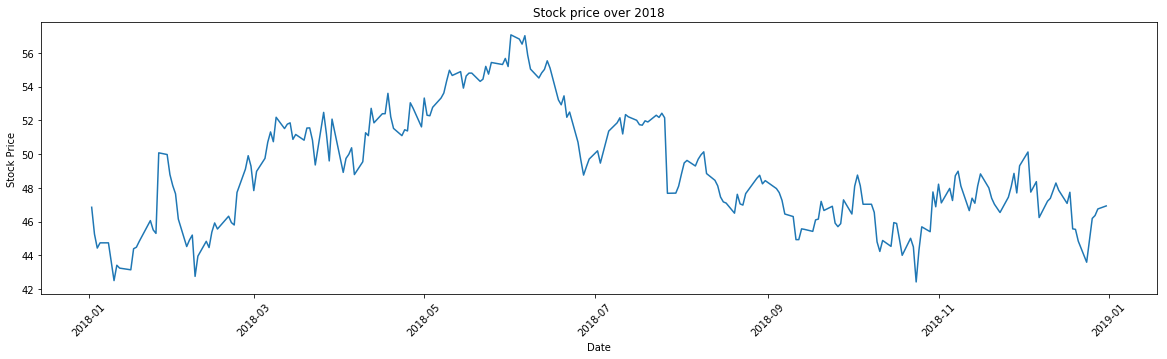

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(20,5))
plt.title("Stock price over 2018")
plt.ylabel("Stock Price")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.plot(year_date_list, year_price_list)
plt.yticks()
#plt.gcf().subplots_adjust(bottom=0.3)
#plt.autoscale()
plt.show()
plt.clf()      

In [13]:
df['Volume'] = df['Volume'].astype(int)
df3 = df.groupby(df['Year']).mean()
df3['Year'] = df3.index
df3

,index,Open,Close,High,Low,Volume,Year
Year,,,,,,,
1972,65.5,0.037197,0.037197,0.037197,0.037197,0.000000e+00,1972
1973,258.5,0.060709,0.060709,0.062283,0.060709,1.150000e+04,1973
1974,512.0,0.085217,0.085217,0.087549,0.085217,2.932134e+04,1974
1975,764.0,0.112191,0.112191,0.114183,0.112191,3.062470e+04,1975
1976,1015.0,0.171434,0.171434,0.175418,0.171434,2.131713e+04,1976
1977,1266.5,0.132500,0.132500,0.137024,0.132500,2.481825e+04,1977
1978,1518.0,0.155179,0.155179,0.159880,0.155179,2.625896e+04,1978
1979,1770.0,0.265099,0.265099,0.270711,0.265099,4.325889e+04,1979
1980,2023.0,0.397194,0.397194,0.401186,0.397194,7.338577e+04,1980


In [14]:
vol_date_list = df3['Year'].tolist()
vol_close_list = df3['Volume'].tolist()

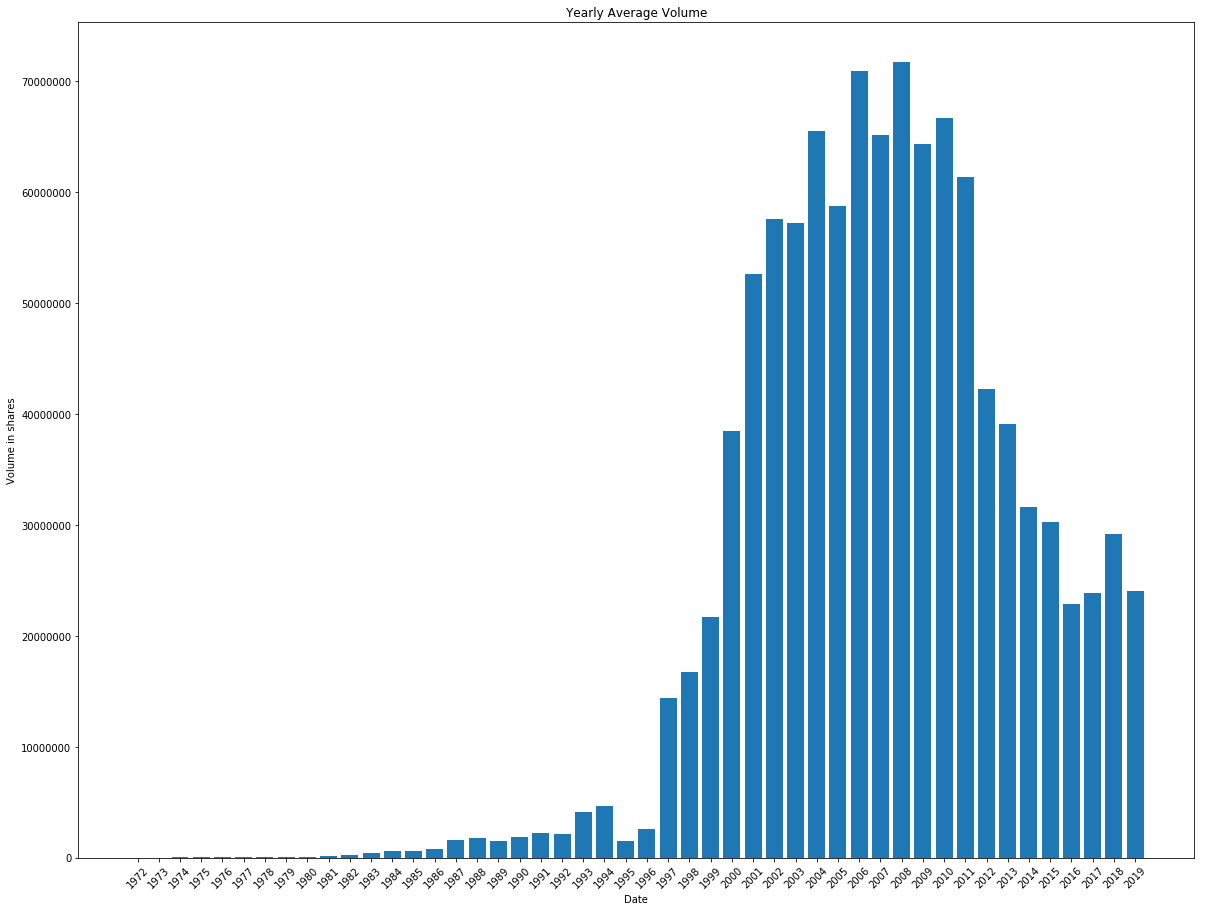

In [15]:
plt.figure(figsize=(20,20))
plt.title("Yearly Average Volume")
plt.ylabel("Volume in shares")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain')
plt.bar(vol_date_list, vol_close_list)
plt.subplots_adjust(bottom=0.3)
plt.show()